In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import initializers
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [71]:
def load_data(w,b):
    num_datos=40
    np.random.seed(5)
    error=np.random.normal(0,0.06,num_datos)
    x=np.random.uniform(-1,1,num_datos)
    y=(w*x+b)+error
    
    datos=np.column_stack((x,y))
    
    return datos

In [96]:
def plot_result(title,model,history,x_train, x_test, y_train, y_test):
    figure=plt.figure(figsize=(16, 5))

    loss_axis = figure.add_subplot(121)
    loss_axis.plot(history.history['loss'],label="loss")
    loss_axis.plot(history.history['val_loss'],label="val_loss")
    loss_axis.legend(fontsize=15,facecolor='#FFFFFF')
    loss_axis.set_xlabel('Época', fontsize=15,labelpad=20,color="#003B80") 
    loss_axis.set_ylabel('Error cuadrático medio', fontsize=15,labelpad=20,color="#003B80")
    loss_axis.set_title("loss:" + title)
    loss_axis.set_ylim(0,0.01)

    result_axis = figure.add_subplot(122)
    result_axis.scatter(x_train,y_train,10,color="r")
    result_axis.scatter(x_test,y_test,10,color="g")
    x=np.linspace(-1,1, 2000)
    y=model.predict(x)
    result_axis.scatter(x,y,5,color="#BF404A")
    result_axis.set_title("resultado:"+title)    

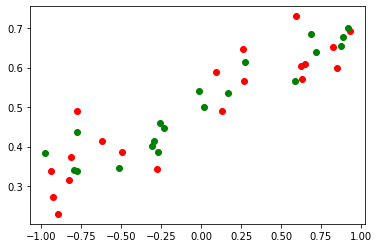

In [85]:
datos=load_data(0.2,0.5)


x_train, x_test, y_train, y_test = train_test_split(datos[:,0], datos[:,1], test_size=0.5,shuffle=False)
plt.scatter(x_train,y_train,c="r")
plt.scatter(x_test,y_test,c="g")

In [102]:
results=[]

In [104]:
red=[(0,0),(2,8),(4,16),(8,32),(8,64),(8,120)]

for num_capas,num_neuronas in red:
    model=keras.models.Sequential()
    print("Creando modelo de " ,num_capas , " capas")
    for num_capa in range(0, num_capas):
        print("añadiendo capa con ",num_neuronas," neuronas")
        model.add(keras.layers.Dense(num_neuronas,kernel_initializer=initializers.RandomNormal(stddev=0.05,seed=num_capa*2),bias_initializer=initializers.RandomNormal(stddev=0.05,seed=num_capa*2+1)))
        model.add(keras.layers.ELU(alpha=3.0)) 

    if num_capas>0:
        print("añadiendo capa con ",num_neuronas/2," neuronas")
        model.add(keras.layers.Dense(num_neuronas/2,kernel_initializer=initializers.RandomNormal(stddev=0.05,seed=100),bias_initializer=initializers.RandomNormal(stddev=0.05,seed=101)))
    model.add(keras.layers.Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.05,seed=102),bias_initializer=initializers.RandomNormal(stddev=0.05,seed=103)))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='mean_squared_error')
    history=model.fit(x=x_train,y=y_train,epochs=600, validation_data=(x_test,y_test),verbose=0)
    results.append((model,history,num_capas,num_neuronas));
   


Creando modelo de  0  capas
Creando modelo de  2  capas
añadiendo capa con  8  neuronas
añadiendo capa con  8  neuronas
añadiendo capa con  4.0  neuronas
Creando modelo de  4  capas
añadiendo capa con  16  neuronas
añadiendo capa con  16  neuronas
añadiendo capa con  16  neuronas
añadiendo capa con  16  neuronas
añadiendo capa con  8.0  neuronas
Creando modelo de  8  capas
añadiendo capa con  32  neuronas
añadiendo capa con  32  neuronas
añadiendo capa con  32  neuronas
añadiendo capa con  32  neuronas
añadiendo capa con  32  neuronas
añadiendo capa con  32  neuronas
añadiendo capa con  32  neuronas
añadiendo capa con  32  neuronas
añadiendo capa con  16.0  neuronas
Creando modelo de  8  capas
añadiendo capa con  64  neuronas
añadiendo capa con  64  neuronas
añadiendo capa con  64  neuronas
añadiendo capa con  64  neuronas
añadiendo capa con  64  neuronas
añadiendo capa con  64  neuronas
añadiendo capa con  64  neuronas
añadiendo capa con  64  neuronas
añadiendo capa con  32.0  neurona

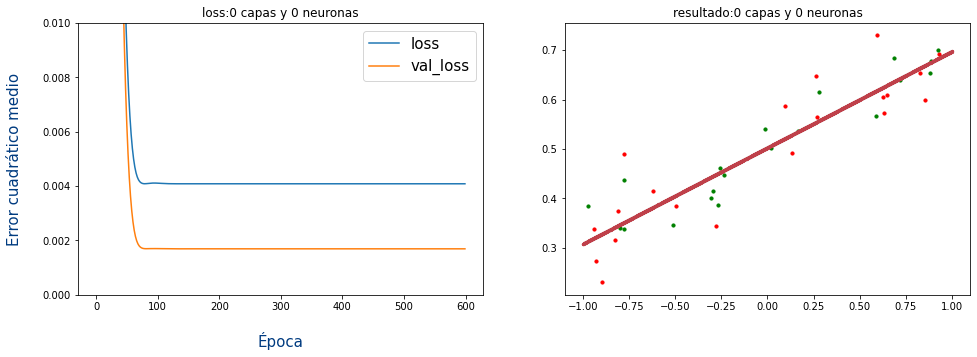

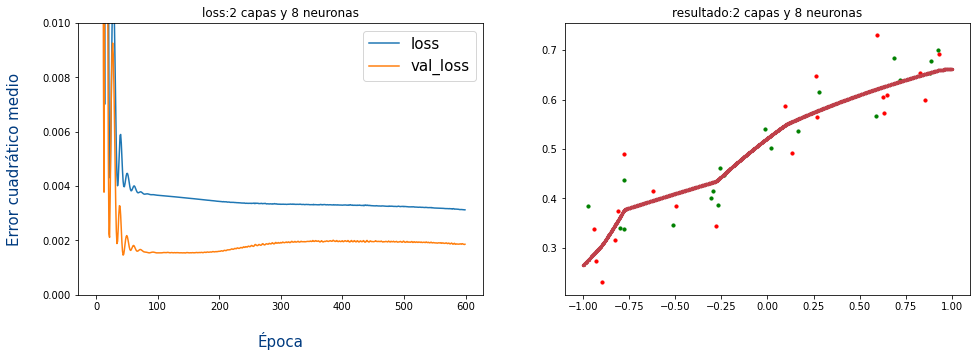

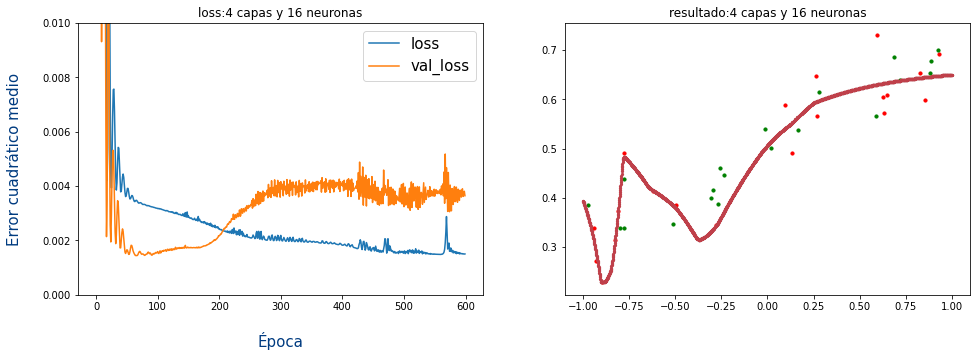

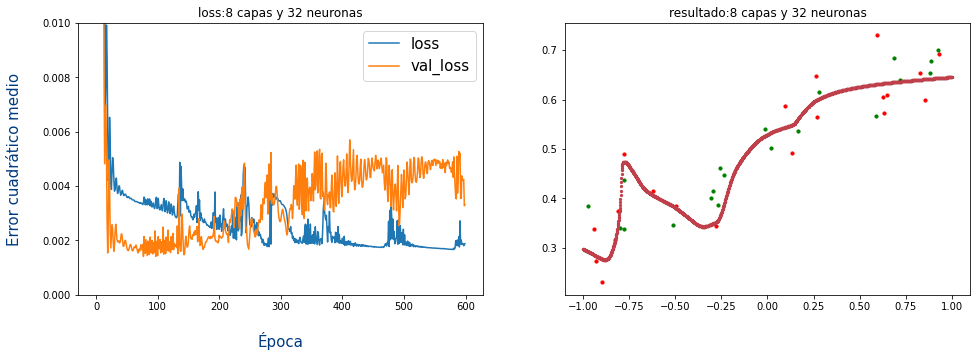

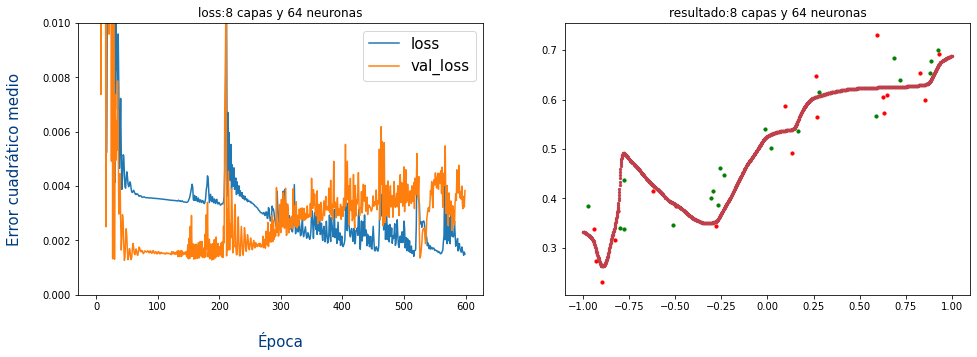

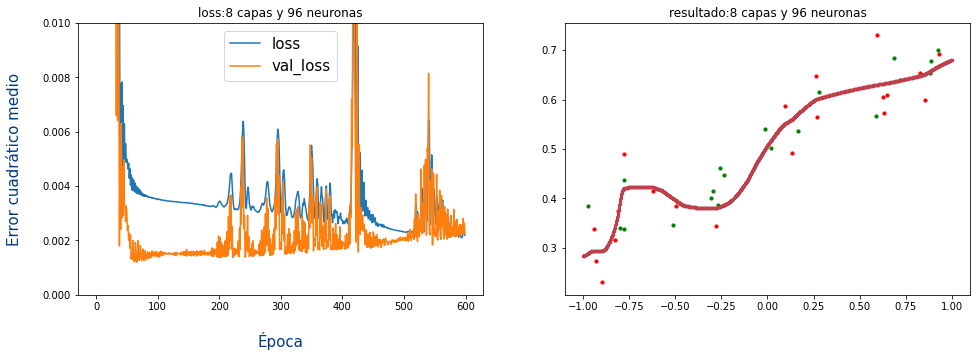

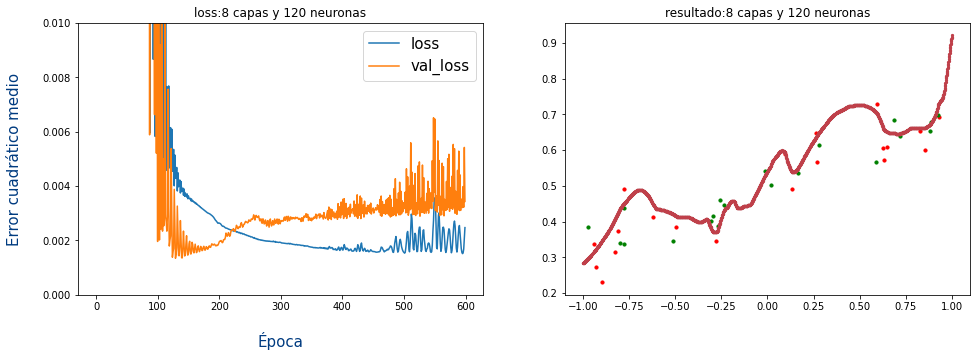

In [105]:
for model,history,num_capas,num_neuronas in results:
      plot_result(str(num_capas) + " capas y " + str(num_neuronas) + " neuronas" ,model,history,x_train, x_test, y_train, y_test)